# Task 2.2 – Smoothing

Smoothing is a naive and effective technique in time series forecasting.

It can be used for data preparation, feature engineering, and even directly for making predictions.

## Moving Average Smoothing

Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.

A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value.

The “moving” part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calculate the average values in the new series.

### Dataset

This dataset describes the number of daily female births in California in 1959.

In [1]:
import pandas as pd

df = pd.read_csv('./data/2_2_births.csv')

In [2]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


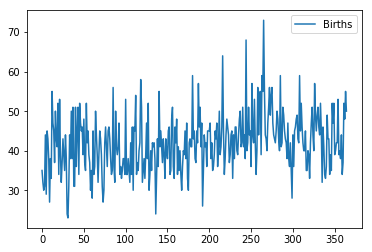

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  

df.plot()

This dataset is a good example for exploring the moving average method as it does not show any clear trend or seasonality.

Moving average can be used as a data preprocessing technique to create a smoothed version of the original dataset.

Smoothing is useful as a data preparation technique as it can reduce the random variation in the observations and better expose the structure of the underlying causal processes.

The rolling() function on the DataFrame will automatically group observations into a window. You can specify the window size, and by default a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset.

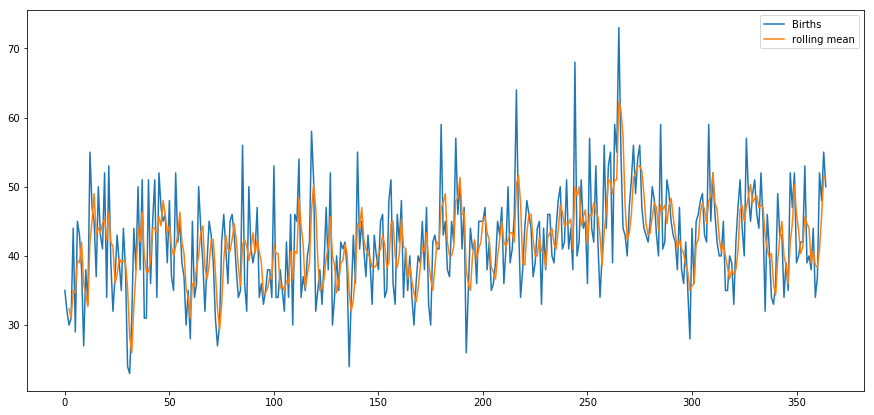

In [4]:
rolling = df['Births'].rolling(window=3)
df['rolling mean'] = rolling.mean()

df.plot(figsize=[15,7])

### Task 2.2-1

1. Change the window size to 10.
* Try to avoid a lag by centering the moving average window.

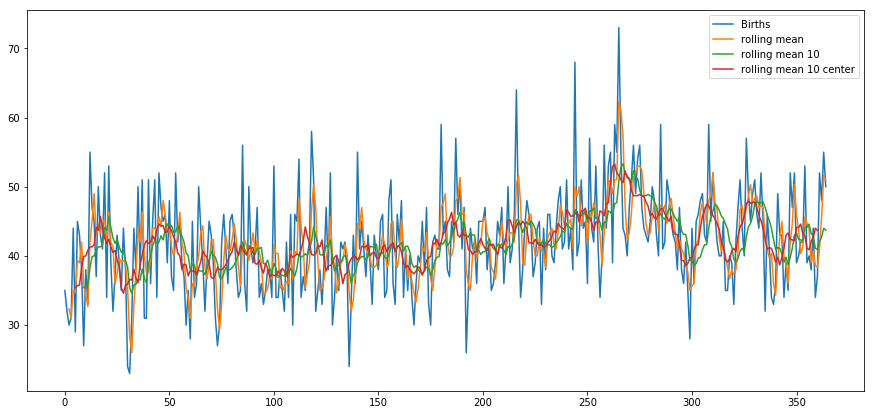

In [5]:
# Change the window size to 10.
df['rolling mean 10'] = df['Births'].rolling(window=10).mean()

# Try to avoid a lag by centering the moving average window.
df['rolling mean 10 center'] = df['Births'].rolling(window=10, center=True).mean()

df.plot(figsize=[15,7])

# Appendix

### Centered Moving Average

The value at time (t) is calculated as the average of raw observations at, before, and after time (t).

For example, a center moving average with a window of 3 would be calculated as:

```
center_ma(t) = mean(obs(t-1), obs(t), obs(t+1))
```

This method requires knowledge of future values, and as such is used on time series analysis to better understand the dataset.

A center moving average can be used as a general method to remove trend and seasonal components from a time series, a method that we often cannot use when forecasting.

### Trailing Moving Average

The value at time (t) is calculated as the average of the raw observations at and before the time (t).

For example, a trailing moving average with a window of 3 would be calculated as:

```
trail_ma(t) = mean(obs(t-2), obs(t-1), obs(t))
```

Trailing moving average only uses historical observations and is used on time series forecasting.

It is the type of moving average that we will focus on in this tutorial.